In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

/Users/ryanchankh/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
weights = np.load("./vgg/vgg19.npy", encoding='latin1').item()

In [3]:
# Layer names in VGG19
print(weights.keys())

dict_keys(['conv5_4', 'conv5_1', 'fc6', 'conv5_3', 'conv5_2', 'conv4_4', 'fc7', 'conv4_1', 'conv4_2', 'conv4_3', 'fc8', 'conv3_4', 'conv3_3', 'conv3_2', 'conv3_1', 'conv1_1', 'conv1_2', 'conv2_2', 'conv2_1'])


In [4]:
# ksize: 3 x 3
# stride: 1
# padding: SAME

# from https://www.tensorflow.org/api_docs/python/tf/nn/conv2d, 
# we know that filter shape is [filter_height, filter_width, in_channels, out_channels]

In [5]:
def filter_arr(layers):
    filters = []
    for l in layers:
        filters.append(weights[l][0].flatten())
    return np.hstack(filters)

def bias_arr(layers):
    filters = []
    for l in layers:
        filters.append(weights[l][1].flatten())
    return np.hstack(filters)

def filter_hist(filter_arr, bin_size, arr_min=0, arr_max=0):
    arr_min = arr_min or np.min(filter_arr)
    arr_max = arr_max or np.max(filter_arr)
    bins = np.arange(arr_min, arr_max, bin_size)
    print("Min: {}\tMax: {}".format(arr_min, arr_max))
    
    plt.hist(filter_arr, bins)

Min: -0.04	Max: 0.04


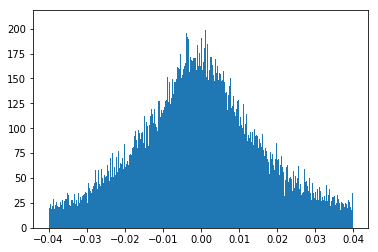

In [10]:
layer = ["conv2_1"]
filter_hist(filter_arr(layer), 0.0001, -0.04, 0.04)

Min: -0.04	Max: 0.04


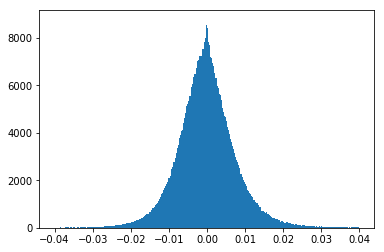

In [7]:
layer = ["conv4_1"]
filter_hist(filter_arr(layer), 0.0001, -0.04, 0.04)

In [8]:
np.mean(weights[l][0])

NameError: name 'l' is not defined

## TEST FOR VGG19

In [ ]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

import utils
from vgg.vgg import VGG19

In [ ]:
# hyperparameters
styl_path = "./images/style/starry_night.jpg"
cont_path = "./images/content/tubingen.jpg"

img_shape = (1, 224, 224, 3) #utils.optimal_dimension(cont_path)

all_layers = ["conv1_1", "conv1_2", 
              "conv2_1", "conv2_2", 
              "conv3_1", "conv3_2", "conv3_3", "conv3_4",
              "conv4_1", "conv4_2", "conv4_3", "conv4_4", 
              "conv5_1", "conv5_2", "conv5_3", "conv5_4"]
styl_layers = all_layers #["conv1_1", "conv2_1", "conv3_1", "conv4_1", "conv5_1"]
cont_layers = styl_layers

In [ ]:
# load images
styl_img = utils.load_image2(styl_path, img_shape)
cont_img = utils.load_image2(cont_path, img_shape)
init_img = utils.load_init_image2(cont_img, styl_img, img_shape)

# preprocess
styl_img = utils.img_preprocess2(styl_img)
cont_img = utils.img_preprocess2(cont_img)
init_img = utils.img_preprocess2(init_img)

In [ ]:
# initial a model for each activity
with tf.Session() as sess:
    gen_styl_act = VGG19().build(init_img).layer_dict(styl_layers)
    gen_cont_act = VGG19().build(init_img).layer_dict(cont_layers)
 
    test1_styl = {}
    for l in styl_layers:
        test1_styl[l] = sess.run(gen_styl_act[l])
        #print(l, "\n", sess.run(gen_styl_act[l]))
        
    test1_cont = {}
    for l in cont_layers:
        test1_cont[l] = sess.run(gen_cont_act[l])
        #print(l, '\n', sess.run(gen_cont_act[l]))

In [ ]:
# initial one model, then build image for each activity 
with tf.Session() as sess:
    vgg_model = VGG19()
    gen_styl_act = vgg_model.build(init_img).layer_dict(styl_layers)
    gen_cont_act = vgg_model.build(init_img).layer_dict(cont_layers)
    
    test2_styl = {}
    for l in styl_layers:
        test2_styl[l] = sess.run(gen_styl_act[l])
    
    test2_cont = {}
    for l in cont_layers:
        test2_cont[l] = sess.run(gen_cont_act[l])

In [ ]:
# initial one model, one build image for each activity 
with tf.Session() as sess:
    vgg_model = VGG19().build(init_img)
    gen_styl_act = vgg_model.layer_dict(styl_layers)
    gen_cont_act = vgg_model.layer_dict(cont_layers)
    
    test3_styl = {}
    for l in styl_layers:
        test3_styl[l] = sess.run(gen_styl_act[l])
    
    test3_cont = {}
    for l in cont_layers:
        test3_cont[l] = sess.run(gen_cont_act[l])

In [ ]:
# init one model, for different images
with tf.Session() as sess:
    vgg_model = VGG19()
    cont_act = vgg_model.build(cont_img).layer_dict()
    styl_act = vgg_model.build(styl_img).layer_dict()
    
    test4_cont = {}
    for l in styl_layers:
        test4_cont[l] = sess.run(cont_act[l])
    
    test4_styl = {}
    for l in cont_layers:
        test4_styl[l] = sess.run(styl_act[l])

In [ ]:
np.allclose(test4_cont["conv1_1"], test4_styl["conv1_1"])

In [ ]:
with tf.Session() as sess:
    vgg_model = VGG19()
    cont_act = vgg_model.build(cont_img)
    
    # using layer_dict() function
    test5_func = cont_act.layer_dict(["conv1_1"])
    
    # using object reference
    test5_ref = cont_act.conv1_1
    
    x = sess.run(test5_func)
    y = sess.run(test5_ref)
    print(np.allclose(x["conv1_1"], y))